This is the setup portion assuming you already have tracks.csv downloaded and the to_write.csv created from Unsupervised learning

In [148]:
import pandas as pd
import numpy as np 
import csv
from sklearn import linear_model
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA,TruncatedSVD

from sklearn.metrics import classification_report

Change DATADIR to your directory path to tracks.csv

In [149]:
DATADIR = '/Users/harrison/Harrison/CS4641/Project/tracks.csv'
#CATEGORIES = ["Rock", "Pop", "Jazz", "Rap", "Hip Hop", "EDM", "Funk"]
results = []

counter = 0
min_tempo = float('inf')
max_tempo = float('-inf')

min_loud = float('inf')
max_loud = float('-inf')

with open(DATADIR) as csvfile:
    reader = csv.reader(csvfile)#, quoting=csv.QUOTE_NONNUMERIC) # change contents to floats
    for row in reader: # each row is a list
        row = np.delete(row, 0,0) # id
        row = np.delete(row, 0,0) # name 
        row = np.delete(row, 0,0) # popularity
        row = np.delete(row, 0,0) # duration_ms
        row = np.delete(row, 0,0) # explicit
        row = np.delete(row, 0,0) # artists
        row = np.delete(row, 0,0) # id_artists
        row = np.delete(row, 0,0) # release_date
        row = np.delete(row, 2,0) # key
        row = np.delete(row, 10,0) # time signature
        if not row[0] == 'danceability': #ignore the first row of labels
            row = row.astype(np.float)
            results.append(row)
            
            current_tempo = row[9]
            if current_tempo > max_tempo:
                max_tempo = current_tempo
            if current_tempo < min_tempo:
                min_tempo = current_tempo
                
            current_loud = row[2]
            if current_loud > max_loud:
                max_loud = current_loud
            if current_loud < min_loud:
                min_loud = current_loud


for i in range(len(results)):
    results[i][9] = (results[i][9] - min_tempo) / (max_tempo - min_tempo)
    results[i][2] = (results[i][2] - min_loud) / (max_loud - min_loud)



In [150]:
print(results[0])



[0.645      0.445      0.71374816 1.         0.451      0.674
 0.744      0.151      0.127      0.42556447]


Change DATADIR_2 to your directory path to to_write.csv

In [151]:
DATADIR_2 = '/Users/harrison/Harrison/CS4641/Project/to_write.csv'
target = []
with open(DATADIR_2) as csvfile2:
    reader2 = csv.reader(csvfile2)
    for row in reader2:
        if not row[0] == 'Cluster':
            row = np.array(row)
            row = row.astype(np.float)
            target.append(row)

In [152]:
df_x = pd.DataFrame(results)
df_y = pd.DataFrame(target)

# Below is an attempt at Linear Regression. The results are very very poor so we needed to try something else.

In [153]:
reg = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.2, random_state=4)
reg.fit(x_train,y_train)


LinearRegression()

In [154]:
reg.score(x_test,y_test)

0.10777375219799168

In [155]:
Y_pred = np.argmax(reg.predict(x_test),axis=1)
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.08      1.00      0.14      8991
         1.0       0.00      0.00      0.00      3335
         2.0       0.00      0.00      0.00      4110
         3.0       0.00      0.00      0.00      1521
         4.0       0.00      0.00      0.00      3634
         5.0       0.00      0.00      0.00      5394
         6.0       0.00      0.00      0.00      1083
         7.0       0.00      0.00      0.00       663
         8.0       0.00      0.00      0.00      9140
         9.0       0.00      0.00      0.00      3007
        10.0       0.00      0.00      0.00      3337
        11.0       0.00      0.00      0.00      4164
        12.0       0.00      0.00      0.00      3774
        13.0       0.00      0.00      0.00      6065
        14.0       0.00      0.00      0.00      1609
        15.0       0.00      0.00      0.00      3096
        16.0       0.00      0.00      0.00      9153
        17.0       0.00    

/Users/harrison/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Trying Linear Regression with PCA

In [156]:
pca = PCA(n_components=10, whiten='True')
x = pca.fit(df_x).transform(df_x)

In [157]:
reg = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x,df_y,test_size=0.2, random_state=4)
reg.fit(x_train,y_train)

LinearRegression()

In [158]:
reg.score(x_test,y_test)

0.10777375219799168

In [159]:
Y_pred = np.argmax(reg.predict(x_test),axis=1)
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.08      1.00      0.14      8991
         1.0       0.00      0.00      0.00      3335
         2.0       0.00      0.00      0.00      4110
         3.0       0.00      0.00      0.00      1521
         4.0       0.00      0.00      0.00      3634
         5.0       0.00      0.00      0.00      5394
         6.0       0.00      0.00      0.00      1083
         7.0       0.00      0.00      0.00       663
         8.0       0.00      0.00      0.00      9140
         9.0       0.00      0.00      0.00      3007
        10.0       0.00      0.00      0.00      3337
        11.0       0.00      0.00      0.00      4164
        12.0       0.00      0.00      0.00      3774
        13.0       0.00      0.00      0.00      6065
        14.0       0.00      0.00      0.00      1609
        15.0       0.00      0.00      0.00      3096
        16.0       0.00      0.00      0.00      9153
        17.0       0.00    

/Users/harrison/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Trying Linear Regression with SVD

In [160]:
svd = TruncatedSVD(n_components = 9)
x = svd.fit(df_x).transform(df_x)
reg = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x,df_y,test_size=0.2, random_state=4)
reg.fit(x_train,y_train)

LinearRegression()

In [161]:
reg.score(x_test,y_test)

0.10775748457081513

# This section is for Random Forest

In [162]:
df_x1 = df_x.iloc[:,1:]
df_y1 = df_y.iloc[:,0]

In [163]:
x_train, x_test, y_train, y_test = train_test_split(df_x1,df_y1,test_size=0.2, random_state=4)
rf = RandomForestClassifier(n_estimators = 50)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [164]:
pred = rf.predict(x_test)

In [165]:
s = y_test.values
count = 0
for i in range(len(pred)):
    if pred[i]==s[i]:
        count = count + 1

In [166]:
count/float(len(pred))

0.9488728853283334

In [167]:
print(classification_report(y_test, rf.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      8991
         1.0       0.99      0.98      0.98      3335
         2.0       0.91      0.91      0.91      4110
         3.0       0.95      0.94      0.94      1521
         4.0       0.92      0.93      0.92      3634
         5.0       0.95      0.95      0.95      5394
         6.0       0.96      0.96      0.96      1083
         7.0       0.94      0.92      0.93       663
         8.0       0.96      0.96      0.96      9140
         9.0       0.98      0.98      0.98      3007
        10.0       0.97      0.95      0.96      3337
        11.0       0.89      0.88      0.88      4164
        12.0       0.94      0.95      0.95      3774
        13.0       0.99      0.99      0.99      6065
        14.0       0.96      0.97      0.96      1609
        15.0       0.93      0.93      0.93      3096
        16.0       0.95      0.95      0.95      9153
        17.0       0.94    

# Random Forest with PCA

In [24]:
df_x1 = df_x.iloc[:,1:]
df_y1 = df_y.iloc[:,0]

In [28]:
pca = PCA(n_components=9, whiten='True')
x = pca.fit(df_x1).transform(df_x1)

In [29]:
rf = RandomForestClassifier(n_estimators = 50)
x_train, x_test, y_train, y_test = train_test_split(x,df_y1,test_size=0.2, random_state=4)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [45]:
pred = rf.predict(x_test)

In [46]:
s = y_test.values
count = 0
for i in range(len(pred)):
    if pred[i]==s[i]:
        count = count + 1

In [47]:
count/float(len(pred))

0.9900967315805174

# Mapping Importance Features

In [168]:
import time
import numpy as np

start_time = time.time()
importances = rf.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.064 seconds


In [169]:
from sklearn.ensemble import RandomForestClassifier

feature_names = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

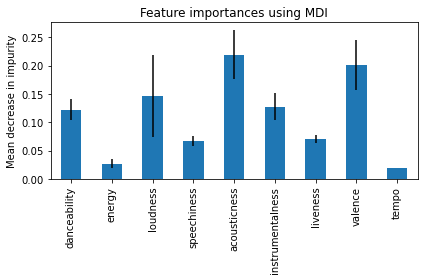

In [170]:
import pandas as pd
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [171]:
print(rf.feature_importances_)

[0.12215569 0.02693289 0.1467606  0.06627454 0.21946629 0.12738305
 0.07065811 0.20094752 0.01942131]
